# Spotify Music Recommendation System using Spotify API



<img src="https://i.pcmag.com/imagery/reviews/042FW7hC9vrGnoDea9LArXI-35.fit_scale.size_1028x578.v1674253030.png" width=600 height=600 />
 
 

To get started with building a Music Recommendation System, we first need to have an access token. The access token serves as a temporary authorization credential, allowing the code to make authenticated requests to the Spotify API on behalf of the application.

The **CLIENT_ID** and **CLIENT_SECRET** variables hold my credentials that uniquely identify the application making requests to the Spotify API. The Client ID identifies the application, while the Client Secret is a confidential key used for authentication.

In [1]:
import requests
import base64

#My credentials that allow me to make requests using Spotify API
CLIENT_ID = '648ece1061bb46c0bc2c7e360700847c'
CLIENT_SECRET = '3a6447a30cee4d869cc32393ce0cfabb'

Next, the client ID and secret are combined in the client_credentials variable, separated by a colon (:). Then, this string is encoded using Base64 encoding to create a secure representation of the credentials. We then proceed to request an access token from the Spotify API.

In [2]:
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
    
client_credentials_base64 = base64.b64encode(client_credentials.encode())

### Requesting token access from Spotify API

The Spotify API sends a POST request to the token url with the client credentials in the authorization header, this is required for client authentication.

The grant_type parameter is set to **client_credentials** to indicate that the application is requesting an access token for the client credentials flow.

With the access token, the application can now make authorized requests to retrieve music data, such as tracks, albums, artists, and user information, which is fundamental for building a music recommendation system using the Spotify API and Python.

In [3]:
#requesting access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization':f'Basic {client_credentials_base64.decode()}'
}

data = {
    'grant_type':'client_credentials'
}

response = requests.post(token_url, data = data, headers = headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained succcessfully.")
else:
    print("Error obtaining accesstoken.")
    exit()

Access token obtained succcessfully.


### Using Spotipy collect music data from any  playlist on Spotify

Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.

Creating the function, **get_trending_playlist_data**, the function begins by initializing the Spotipy client with the provided access_token, which serves as the authentication token to interact with the Spotify Web API. The access_token allows the function to make authorized requests to access Spotify’s resources. The function then uses the Spotipy client to fetch information about the tracks in the specified playlist (identified by its *playlist_id*). The sp.playlist_tracks method retrieves the playlist tracks. The fields parameter is used to specify the specific track information that is required, such as track ID, name, artists, album ID, and album name.

The function then extracts relevant information from the retrieved playlist tracks and stores it in a list of dictionaries called music_data. For each track in the playlist, the function extracts data such as track name, artists (combined into a single string), album name, album ID, track ID, and popularity. The function uses the sp.audio_features method to fetch audio features for each track in the playlist. These audio features include attributes like danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, etc. These audio features provide insights into the characteristics of each track.

The extracted information for all tracks is stored in the *music_data* list. The function then creates a DataFrame from the music_data list. The DataFrame organizes the music data in a tabular format, making it easier to analyze and work with the collected information.

In [4]:
#importing important packages
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [5]:
def get_trending_playlist_data(playlist_id, access_token):
    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

### Getting Playlist data
Here I used the playlist ID" '07NDTthdZ36aiaL6uGUQkK' which comes from the following playlist:

https://open.spotify.com/playlist/07NDTthdZ36aiaL6uGUQkK


Using the function created ealier, to extract music data from the specified playlist using the provided access_token. The collected music data is stored in a DataFrame named **music_df**. Finally, the code prints the DataFrame to display the extracted music data.

In [6]:
playlist_id = '07NDTthdZ36aiaL6uGUQkK'

# Call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)

# Display the DataFrame
print(music_df)

                                           Track Name  \
0                                      Take My Breath   
1                                   Let There Be Rock   
2              Way To Break My Heart (feat. Skrillex)   
3         Hearts On Fire - From "Rocky IV" Soundtrack   
4   Tick Tick Boom (feat. BygTwo3) - From 'SCOOB!'...   
..                                                ...   
95                                            Forever   
96                                          Adore You   
97                                   Watermelon Sugar   
98                                    Blinding Lights   
99                                             No Lie   

                     Artists                      Album Name  \
0                 The Weeknd                         Dawn FM   
1                      AC/DC               Let There Be Rock   
2       Ed Sheeran, Skrillex     No.6 Collaborations Project   
3              John Cafferty                        Rocky I

In [7]:
#Exploratory Data Analysis
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        100 non-null    object 
 1   Artists           100 non-null    object 
 2   Album Name        100 non-null    object 
 3   Album ID          100 non-null    object 
 4   Track ID          100 non-null    object 
 5   Popularity        100 non-null    int64  
 6   Release Date      100 non-null    object 
 7   Duration (ms)     100 non-null    int64  
 8   Explicit          100 non-null    bool   
 9   External URLs     100 non-null    object 
 10  Danceability      100 non-null    float64
 11  Energy            100 non-null    float64
 12  Key               100 non-null    int64  
 13  Loudness          100 non-null    float64
 14  Mode              100 non-null    int64  
 15  Speechiness       100 non-null    float64
 16  Acousticness      100 non-null    float64
 17

<AxesSubplot:>

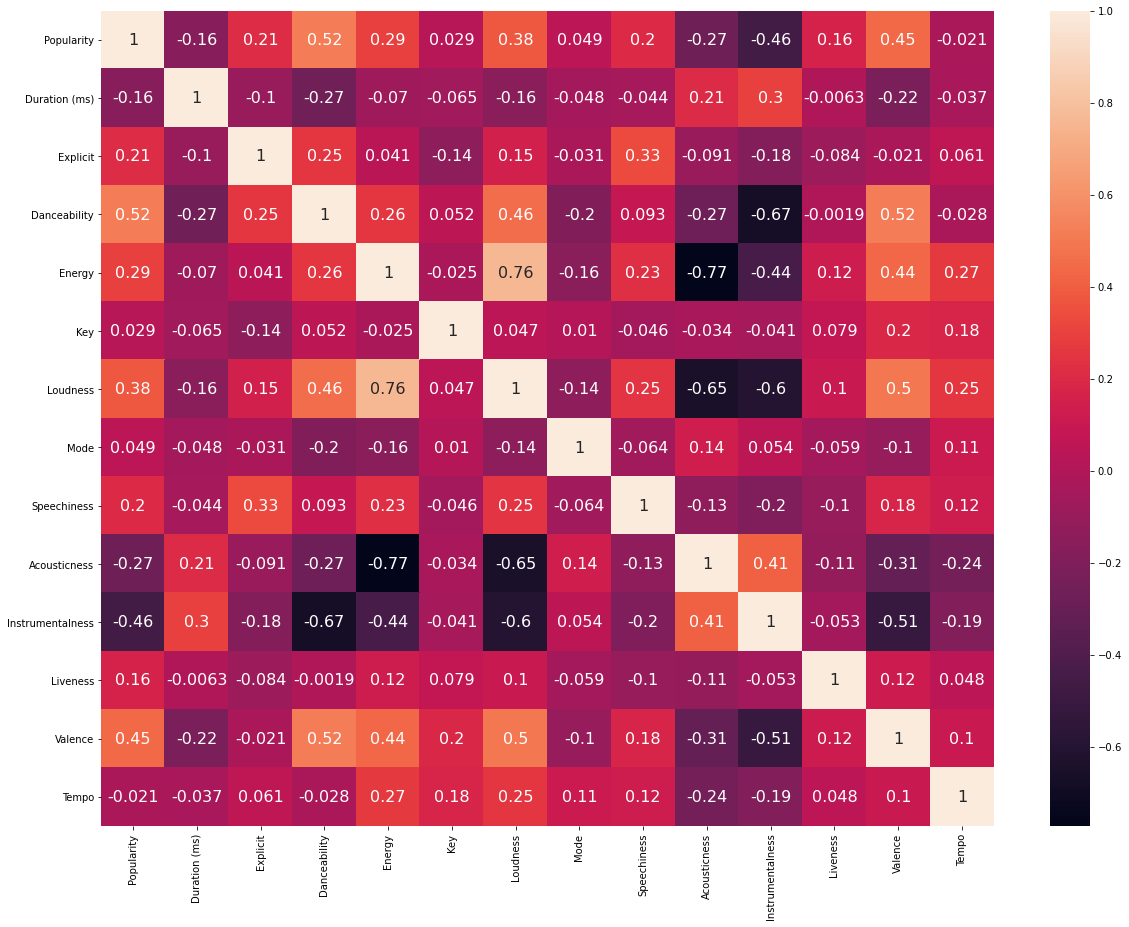

In [8]:
#Pearson correlation of music audio features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cols = ['Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID', 'Release Date', 'External URLs']

corr_df = music_df.drop(cols, axis = 1)
corr = corr_df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, annot_kws={'size': 16})



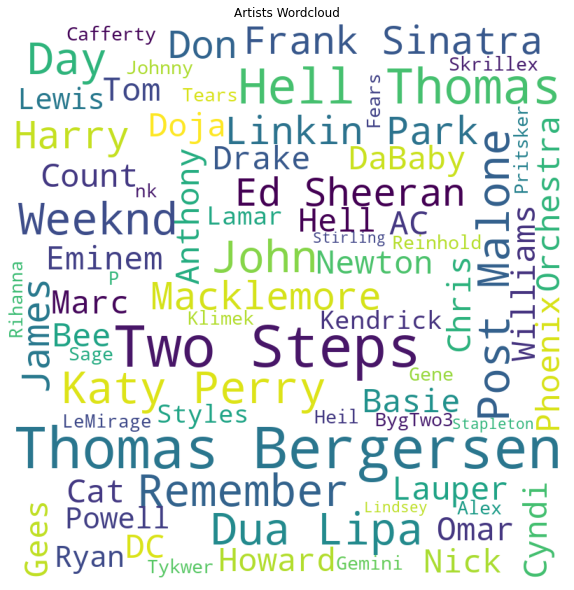

In [9]:
#WordCloud of Artists
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)
comment_words = " ".join(music_df['Artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=70,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artists Wordcloud")
plt.tight_layout(pad = 0)
plt.show()

### Building the music Recommendation system using Python

In [10]:
# Building Music Reccomendation using Python
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

#renaming music dataframe to data
data = music_df

### Normailzing the music features using Min-Max Scaler

In [11]:
#Normaizing the music features using Min-Max scaling
scaler = MinMaxScaler()

music_features = data[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values

music_features_scaled = scaler.fit_transform(music_features)

### Creating Recommendation System based on Music Audio Features


the function **content_based_recommendations** function takes input_song_name as the input, which represents the name of the song for which recommendations are to be generated. The function checks if the input_song_name exists in the music_df DataFrame, which presumably contains the music data with features like ‘Track Name’, ‘Artists’, ‘Album Name’, ‘Release Date’, and ‘Popularity’. If the input song name is found in the music_df DataFrame, the function retrieves the index of the input song in the DataFrame. This index will be used to compare the audio features of the input song with other songs in the dataset.

The function calculates the similarity scores between the audio features of the input song and all other songs in the dataset. It uses **cosine similarity**, a common measure used in content-based filtering. The cosine_similarity function from scikit-learn is employed to compute these similarity scores.

The function identifies the num_recommendations most similar songs to the input song based on their audio features. It does this by sorting the similarity scores in descending order and selecting the top num_recommendations songs. The input song itself is excluded from the recommendations (hence the [1:num_recommendations + 1] slicing). The function then extracts the details (such as track name, artists, album name, release date, and popularity) of the most similar songs from the music_df DataFrame using the indices of the most similar songs.

In [12]:
#creating recomendations based on music audio features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in data['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = data[data['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = data.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return content_based_recommendations

In [13]:
#Getting Reccomendations for 'Paint The Town Red' by Doja Cat.

content_based_recommendations('Paint The Town Red', 25)

,Track Name,Artists,Album Name,Release Date,Popularity
81,Butter,BTS,"Butter (Hotter, Sweeter, Cooler)",2021-06-04,72
37,Sympathy For The Devil - 50th Anniversary Edition,The Rolling Stones,Beggars Banquet (50th Anniversary Edition),1968-12-06,76
68,Fantasy,Mariah Carey,Daydream,1995-10-03,80
4,Tick Tick Boom (feat. BygTwo3) - From 'SCOOB!'...,"Sage The Gemini, BygTwo3",Tick Tick Boom (feat. BygTwo3),2020-05-15,58
88,All The Stars (with SZA),"Kendrick Lamar, SZA",Black Panther The Album Music From And Inspire...,2018-02-09,88
85,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",Hollywood's Bleeding,2019-09-06,88
94,Shivers,Ed Sheeran,Shivers,2021-09-10,1
99,No Lie,"Sean Paul, Dua Lipa",Mad Love The Prequel,2018-06-29,84
9,Girls Just Want to Have Fun,Cyndi Lauper,She's So Unusual,1983-10-14,84
96,Adore You,Harry Styles,Fine Line,2019-12-13,85
